## Review of Numpy and Pandas

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('./Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [8]:
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [9]:
data.shape

(200, 4)

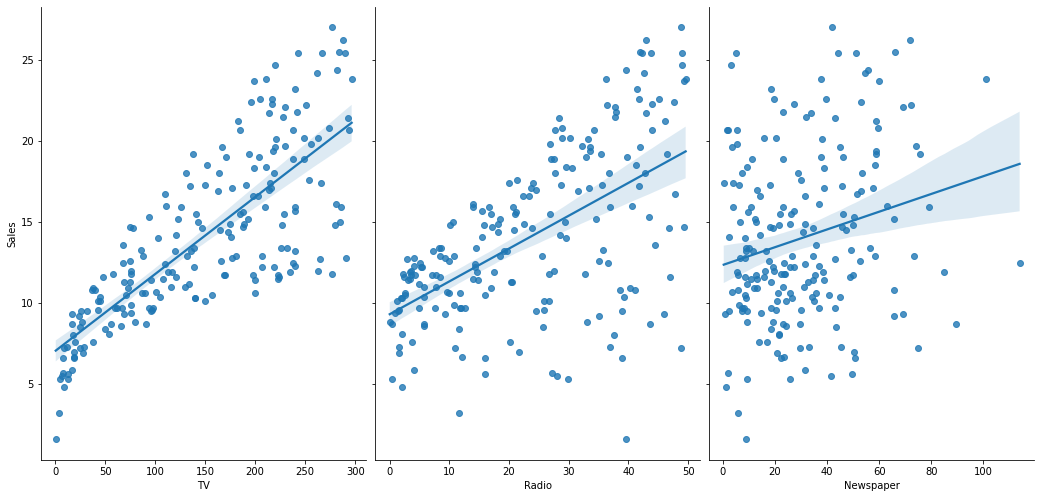

In [10]:
import seaborn as sns
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [11]:
#python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

#create as a dataframe for usage within pandas
X = data[feature_cols]

X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [12]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [13]:
#now go for the response or target value
y = data['Sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

## Split into test and train datasets

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [15]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression()

### Interpret coefficients

In [17]:
print("Coefficient is {}".format(linreg.coef_))
print("Intercept is {}".format(linreg.intercept_))

Coefficient is [0.04656457 0.17915812 0.00345046]
Intercept is 2.87696662231793


In [20]:
#pair feastures with coefficients
zipped = zip(feature_cols, linreg.coef_)
print(zipped)

## Make predictions

In [24]:
y_pred = linreg.predict(X_test)
from sklearn import metrics

In [26]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [27]:
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589


In [28]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328953


# Feature Selection

In [29]:
#Remove newspaper and check RMSE error
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888
